# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents <b>17</b> marketing campaigns.

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
import numpy as np

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
# Function to make plotting easier by feature
def campaign_feature_plot(feature):
    plt.subplots(figsize=(14,6))
    sns.countplot(data=df, x=feature, hue = 'y', palette='husl')
    plt.xlabel(f'Marketing Campaign Acceptance of {feature}')
    plt.xticks(rotation = 90)
    plt.ylabel('Count')
    plt.title(f'Marketing Campaign Acceptance by {feature}')
    plt.show()

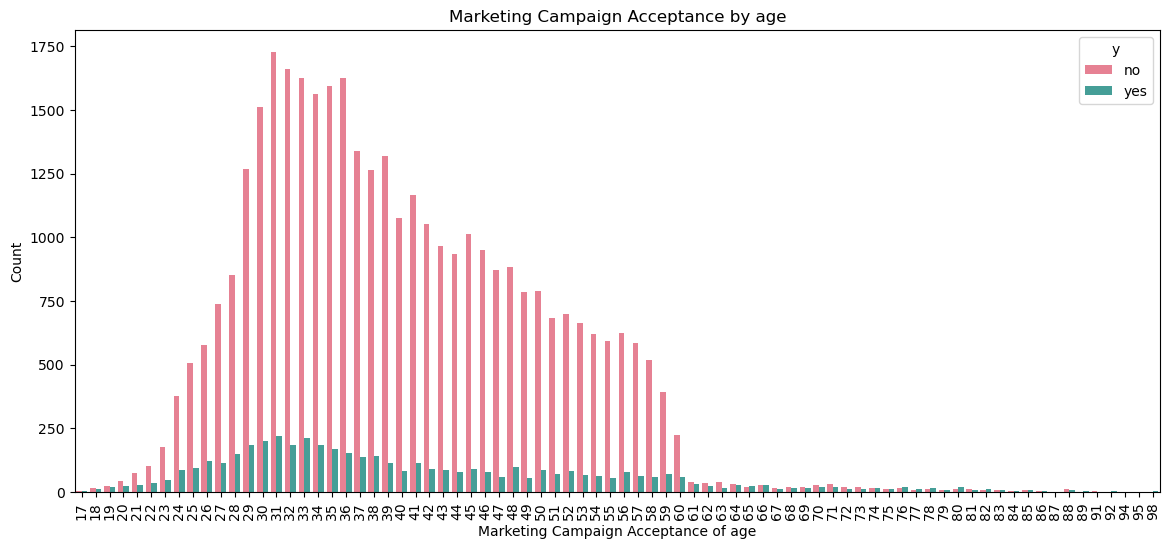

In [10]:
campaign_feature_plot('age')

The plot above shows that majority of data contains ages around 30-45. The successful rate was also higher in this age range.

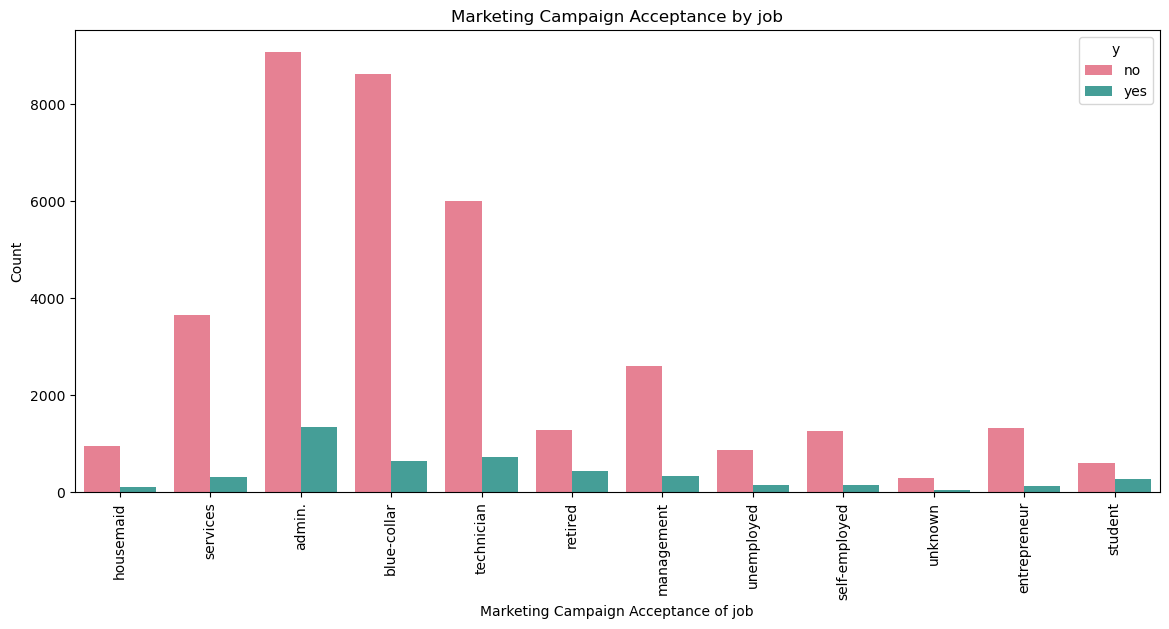

In [12]:
campaign_feature_plot('job')

The plot above shows that clients with admin job subscribed a term deposit the most, followed by technician and blue-collar.

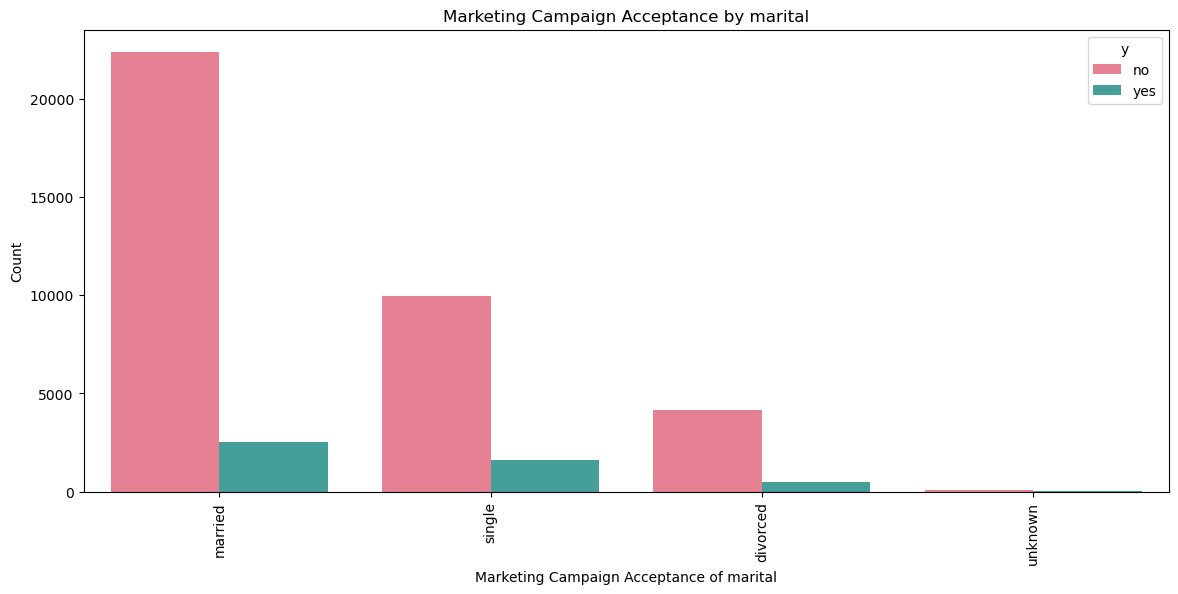

In [14]:
campaign_feature_plot('marital')

The plot above shows that the clients that subscribed the most are the ones that are married, followed by single, and then divorced/widowed. 

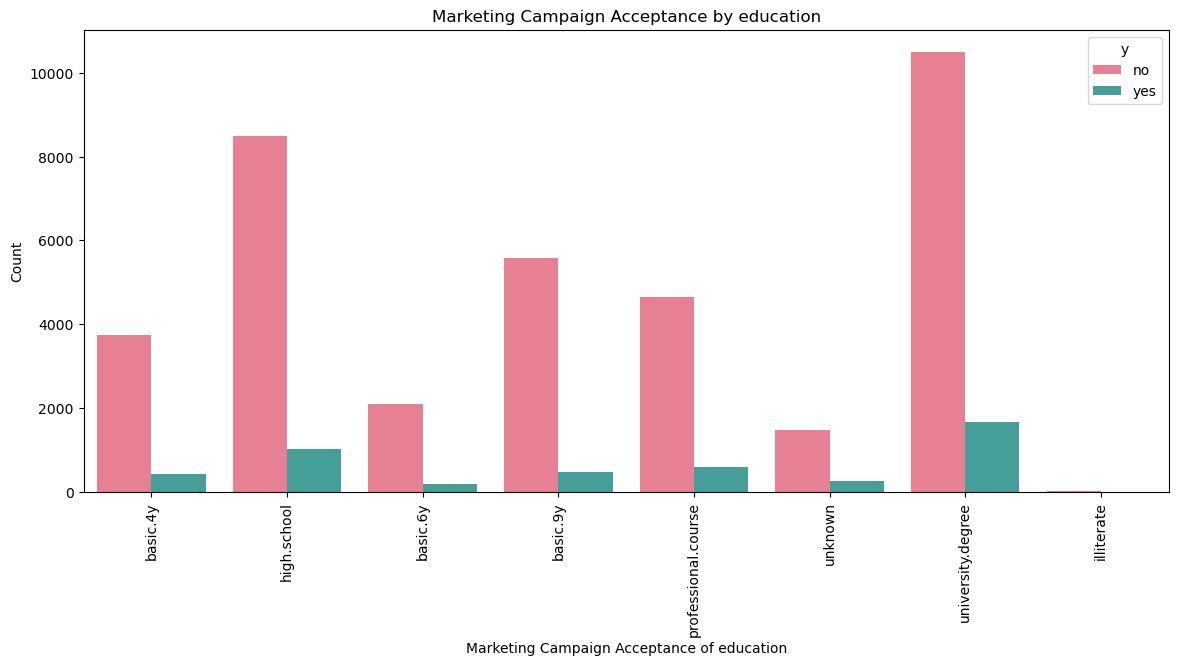

In [16]:
campaign_feature_plot('education')

The plot above shows that clients with a university degree subscribed the most.

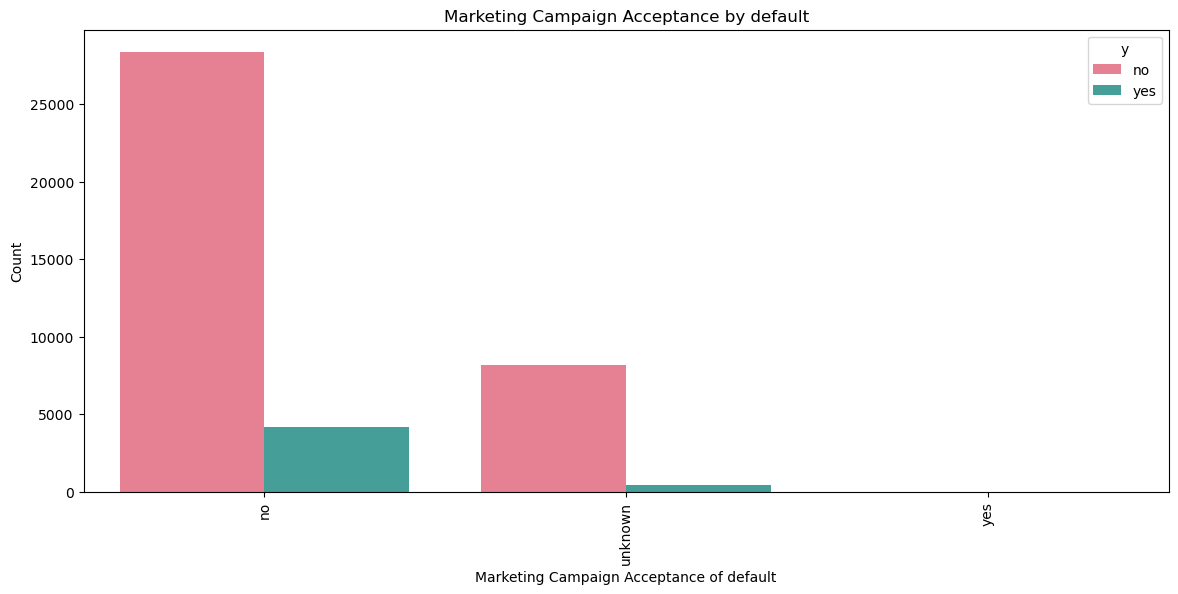

In [18]:
campaign_feature_plot('default')

The plot above shows that cliends that do not have credit in default subscribed the most.

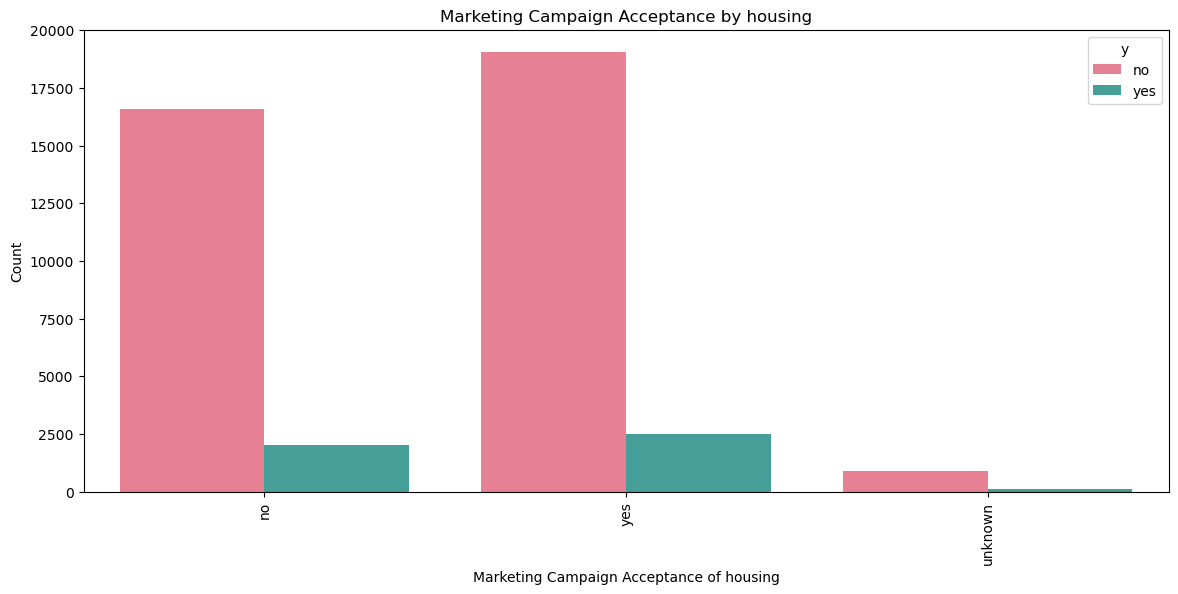

In [20]:
campaign_feature_plot('housing')

The plot above shows that there is about a equivalent success rate for clients that have a housing loan and do not have a housing loan in subscribing a term deposit.

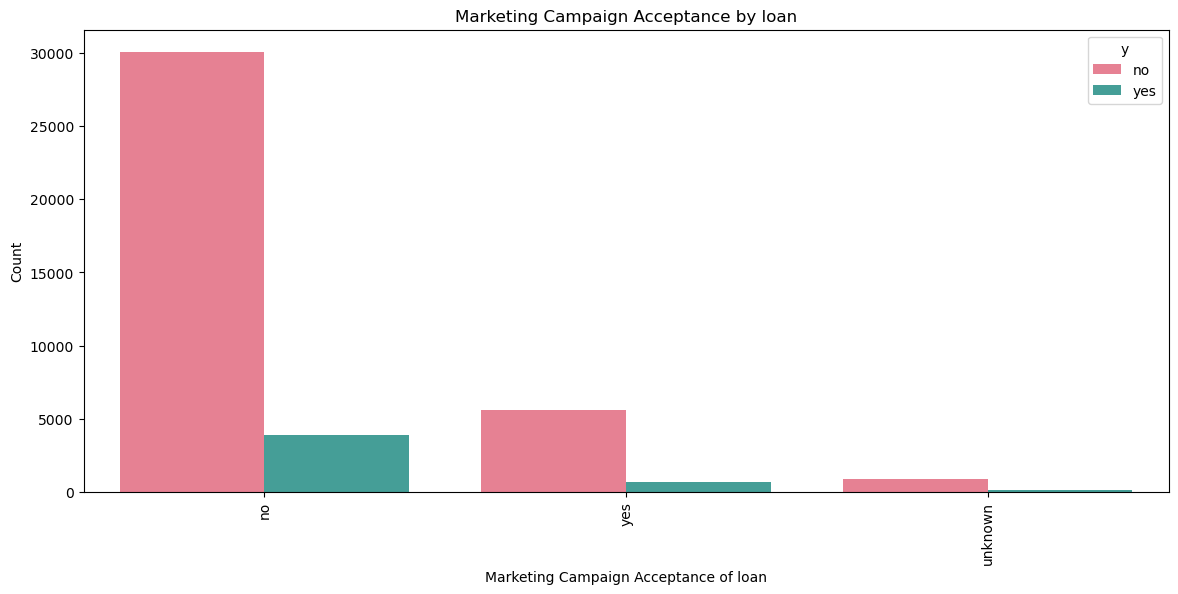

In [22]:
campaign_feature_plot('loan')

The plot above shows that clients that do not have a personal loan subscribed more than people who do have a personal loan.

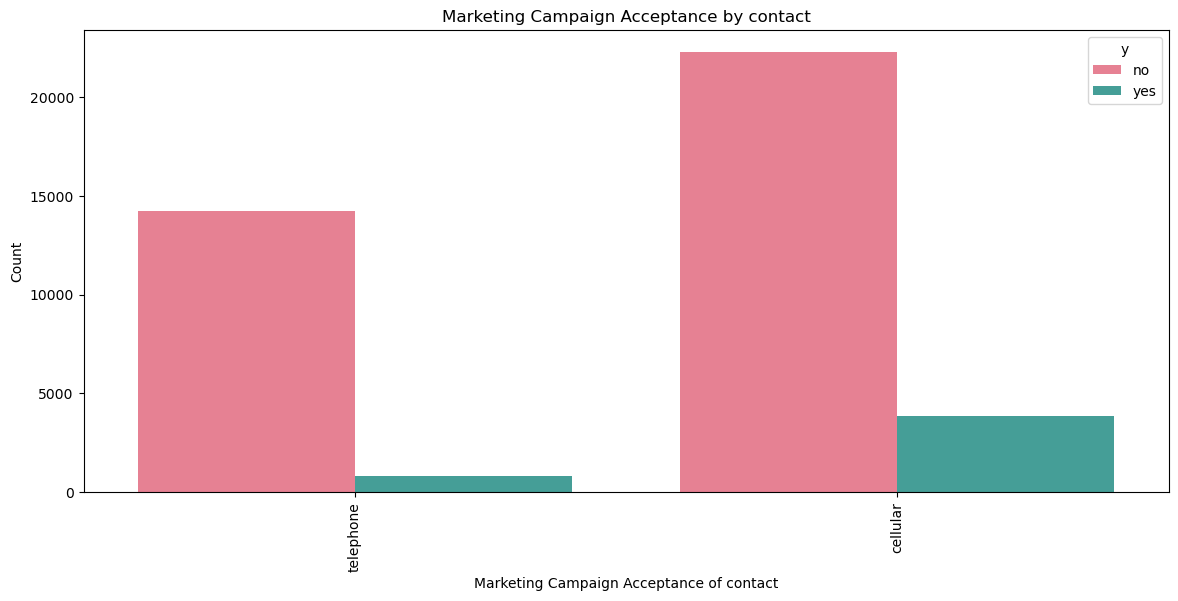

In [24]:
campaign_feature_plot('contact')

The plot above shows that a successful subscription happened when the contact was cellular vs telephone.

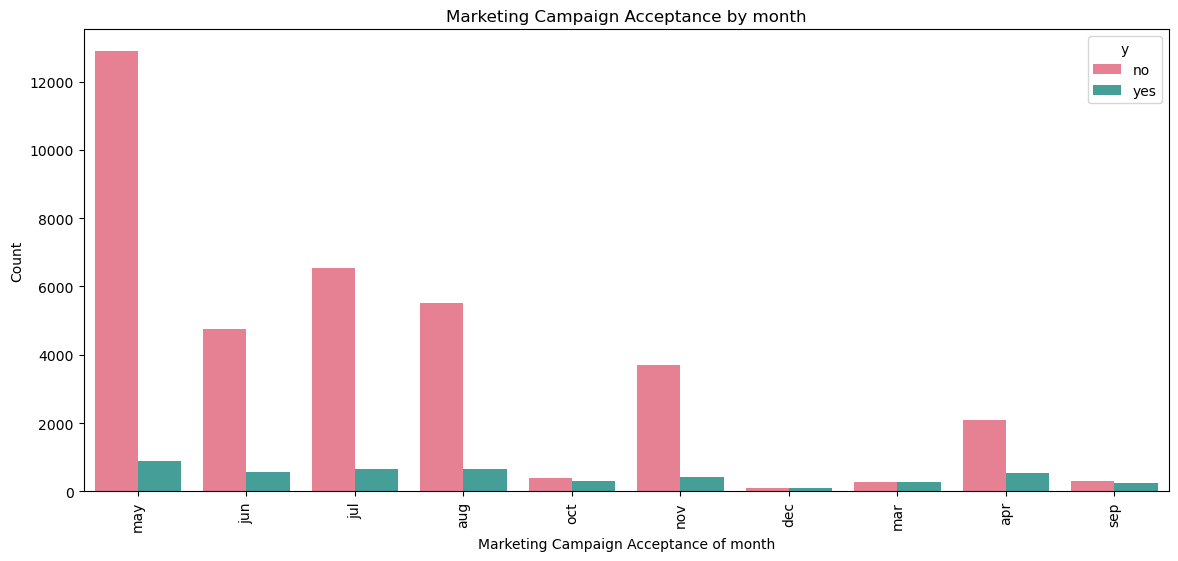

In [26]:
campaign_feature_plot('month')

The plot above shows that successful subscription occurred the most during the months of May, June, July, and August compared to the other months.

In [28]:
# Get count of missing data for each column
missing_data = df.isnull().sum()
missing_data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [29]:
# Find columns that contain the value 'unknown' as they are equivalent to missing
unknown_cols = []
for i in df.columns:
    if 'unknown' in df[i].unique():
        unknown_cols.append(i)
unknown_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [30]:
# Percentages of 'unknown' values for these columns
percentages = []
for col in unknown_cols:
    percentages.append(((df[col] == 'unknown').sum() / df.shape[0]) * 100)

unknown_df = pd.DataFrame({'column': unknown_cols,
                         'percentages_unknown': percentages})

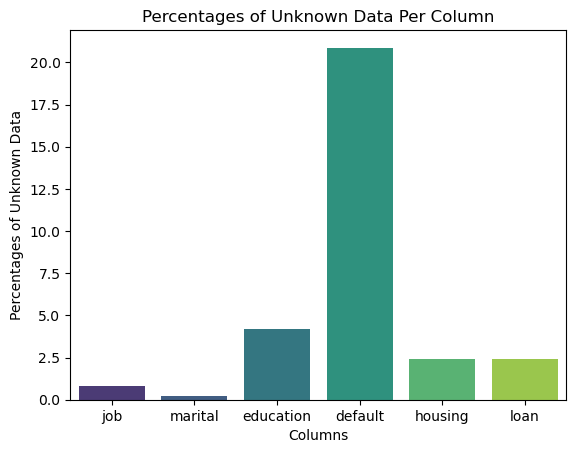

In [31]:
# Plot percentages missing per column that contains 'unknown' values
sns.barplot(x='column', y='percentages_unknown', data=unknown_df, hue='column', palette='viridis')
plt.xlabel('Columns')
plt.ylabel('Percentages of Unknown Data')
plt.title('Percentages of Unknown Data Per Column')
plt.show()

### Clean Data

Although there is no missing data, there are 'unknown' values in the data which can be equivalent as missing, and will not be helpful. Based on the graph showing how much of the data is 'unknown', the rows with these values will be dropped.

In [33]:
# Removing all unknown value rows
original_rows = df.shape[0]
df = df[~df.isin(['unknown']).any(axis=1)]
new_rows = df.shape[0]

print(f'Number of rows deleted from data: {original_rows - new_rows} and number of rows in the data left is: {new_rows}')

Number of rows deleted from data: 10700 and number of rows in the data left is: 30488


#### Duration Column

Because we do not need duration column, it will be dropped from the dataset.

In [35]:
# Drop duration column
df.drop('duration', axis=1, inplace=True)

#### Duplicate Data

Now that all missing data and duration column has been removed, duplicate data will be removed

In [37]:
# Drop duplicates
original_rows = df.shape[0]
df = df.drop_duplicates()
new_rows = df.shape[0]

print(f'Number of duplicate rows removed from data: {original_rows - new_rows} and new data size is: {new_rows}')

Number of duplicate rows removed from data: 1418 and new data size is: 29070


#### Determine Outliers

Through visualizations, outliers will be determined and removed which could impact the overall performance of the model
Below are all the numerical columns present in the dataset. Not all of these columns need to be looked at for outliers.

In [39]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,29070.000000,29070.000000,29070.000000,29070.000000,29070.000000,29070.000000,29070.000000,29070.000000,29070.000000
mean,39.130994,2.573203,954.285277,0.201548,-0.094059,93.524437,-40.602019,3.434260,5159.503203
std,10.388811,2.767491,205.925013,0.532288,1.616251,0.590815,4.810153,1.784995,75.712477
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Box Plots

The box plots below are distributions of the columns age, campaign, pdays, and previous. There are no box plots for the last 5 columns as the data is related to social and economic factors and will not really be important when creating the model.

From the box plots, there are some extreme outliers that will be removed, and we also see some data that is heavily concentrated in pdays at 999, indicating a large portion of data lies at that point. This can be solved with a remapping of the data for this column.

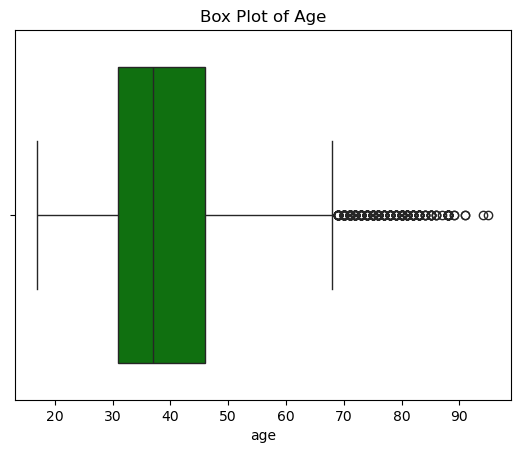

In [41]:
sns.boxplot(x=df['age'], color='green')
plt.title("Box Plot of Age")
plt.show()

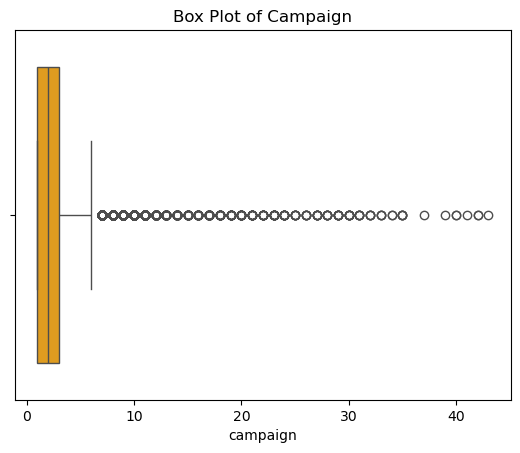

In [42]:
sns.boxplot(x=df['campaign'], color='orange')
plt.title("Box Plot of Campaign")
plt.show()

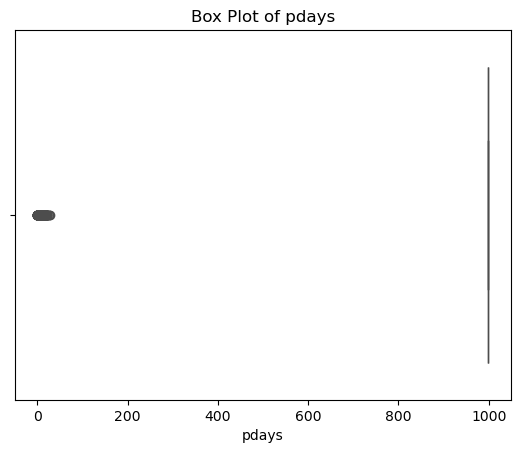

In [43]:
sns.boxplot(x=df['pdays'], color='blue')
plt.title("Box Plot of pdays")
plt.show()

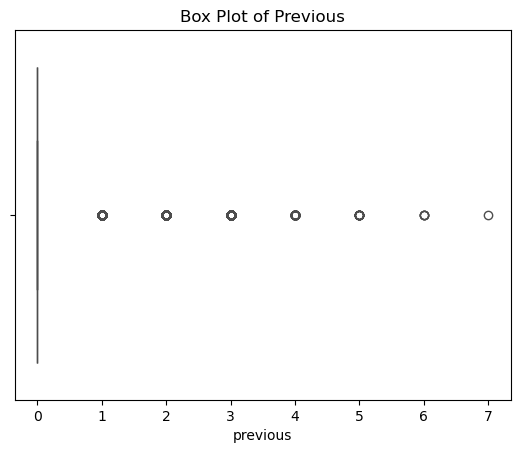

In [44]:
sns.boxplot(x=df['previous'], color='red')
plt.title("Box Plot of Previous")
plt.show()

## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Remove Outliers

Removing outliers of age data by using the outlier rule of 1.5 * IQR (Interquartile Range)

In [49]:
# Calculate outlier boundaries
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df = df.query('age >= @lower_bound and age <= @upper_bound')

In [50]:
df.age.describe()

count    28675.000000
mean        38.623714
std          9.489068
min         17.000000
25%         31.000000
50%         37.000000
75%         45.000000
max         68.000000
Name: age, dtype: float64

### Remapping Values

Columns that contain only no/yes values will be remapped to 0 (no) and 1 (yes).<br/>
Education column will be remapped respective to level of education.<br/>

The columns that will be remapped are:
<ul>
    <li>education</li>
    <li>default</li>
    <li>housing</li>
    <li>loan</li>
    <li>y</li>
</ul>

In [52]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

In [53]:
# Education remapping
df['education'] = df['education'].map({'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 
                                       'basic.9y': 4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7})

In [54]:
# Default remapping
df['default'] = df['default'].map({'no': 0, 'yes': 1})

In [55]:
# Housing remapping
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})

In [56]:
# Loan remapping
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})

In [57]:
# y remapping
df['y'] = df['y'].map({'no': 0, 'yes': 1})

### Change Data Type

Change data type from object to category

In [59]:
df.job = df.job.astype('category')

In [60]:
df.marital = df.marital.astype('category')

-----------------------------------------------------------------------------------
Split dataset to features and target

In [62]:
# Split dataset from first 7 columns and target column
X = df.iloc[:, 0:7]
y = df.y

X.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,2,0,0,0
2,37,services,married,5,0,1,0
3,40,admin.,married,3,0,0,0
4,56,services,married,5,0,0,1
6,59,admin.,married,6,0,0,0


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28675 entries, 0 to 41186
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        28675 non-null  int64   
 1   job        28675 non-null  category
 2   marital    28675 non-null  category
 3   education  28675 non-null  int64   
 4   default    28675 non-null  int64   
 5   housing    28675 non-null  int64   
 6   loan       28675 non-null  int64   
dtypes: category(2), int64(5)
memory usage: 1.4 MB


### Transform Data

All numerical columns will be transformed with StandardScaler. <br/>
We will use One-Hot-Encoding for categorical data<br/>

The transformation of data using One-Hot-Encoder and StandardScaler will be used with Pipelines when building models.

In [65]:
# Separate features based on data type
categorical_data = ['job', 'marital']
numerical_data = ['age', 'education', 'default', 'housing', 'loan']

# Set up column transformer with One-Hot
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_data),
        ('num', StandardScaler(), numerical_data)
    ]
)

## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [67]:
# Split Dataset with a test size of 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [69]:
# Calculate the majority class
majority_class = y_train.value_counts().idxmax()

# Create baseline predictions
baseline_predictions = [majority_class] * len(y_test)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print("Baseline Model Accuracy (Majority Class):", baseline_accuracy)

Baseline Model Accuracy (Majority Class): 0.8718395815170009


The baseline performance that classifier should aim to beat is 87.18%

## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [72]:
# train Logistic Regression model
lr_pipe = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', LogisticRegression())
])
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'education',
                                                   'default', 'housing',
                                                   'loan'])])),
                ('regression', LogisticRegression())])

## Problem 9: Score the Model

What is the accuracy of your model?

In [74]:
# Get score of the model
lr_test_pred = lr_pipe.predict(X_test)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
print(f'Accuracy of model on test data is {lr_test_acc}')

Accuracy of model on test data is 0.8718395815170009


## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [76]:
model_map = {'regression':LogisticRegression(), 'knn': KNeighborsClassifier(), 
             'tree': DecisionTreeClassifier(), 'svc': SVC()}

### Model Training

Created a custom model training function that will create models specified with column transformer. The function returns dataframe of results

In [78]:
# Custom train model function
def train_model(modelMap, models):
    training_time = []
    train_accuracy = []
    test_accuracy = []
    # Iterating over keys and values of map
    for key, value in modelMap.items():
        # Start train time
        start = time.time()
        pipeline = Pipeline(steps=[
            ('preprocessing', column_transformer),
            (key, value)
        ])
        
        pipeline.fit(X_train, y_train)

        # End train time
        end = time.time()
        train_time = end - start

        # Predictions of training/test data
        train_pred = pipeline.predict(X_train)
        test_pred = pipeline.predict(X_test)

        # Accuracy of predictions on train/test data
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)

        # Add results to respective lists
        training_time.append(train_time)
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)

    # Create DF of results
    results = pd.DataFrame({
        'Model': models,
        'Train Time': training_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

    return results
        
        

In [79]:
# Execute training of models
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
results_df = train_model(model_map, models)

### Results

In [81]:
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.048144,0.873409,0.871840
1,KNN,0.009313,0.874542,0.863993
2,Decision Tree,0.042296,0.897777,0.851090
3,SVM,6.485309,0.873409,0.871840


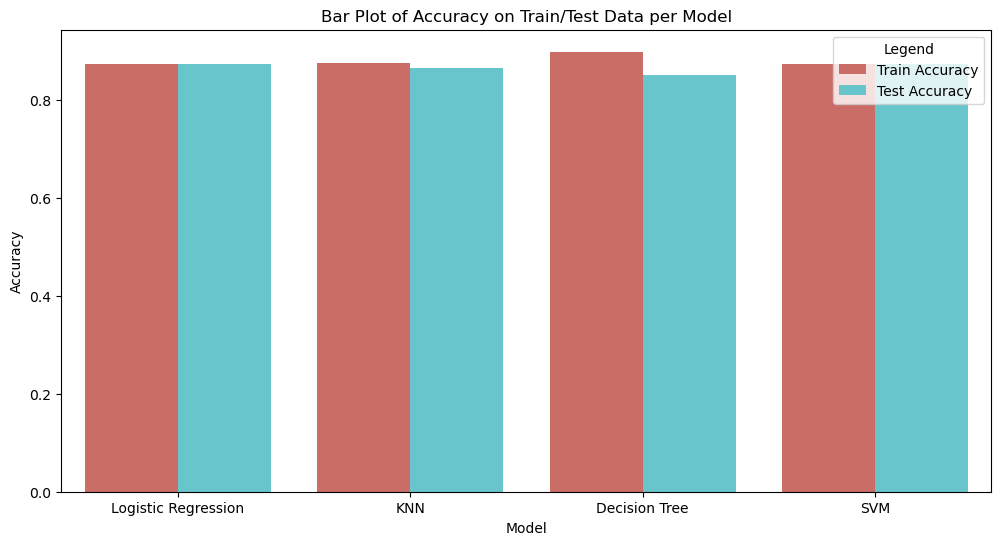

In [82]:
# Plotting both Train/Test Accuracy together
df_melted = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                    var_name='Variable', value_name='Value')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Value', hue='Variable', errorbar=None, palette='hls')

plt.title('Bar Plot of Accuracy on Train/Test Data per Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Legend')
plt.show()

Based on the results, Logistic Regression seems to be the best model as it provides highest accuracy on test data as well as fastest run time. SVM has the same test results but a much slower run time.

## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

For feature exploration and whether or not a feature should be kept in a model or not depends on numerous factors. These factors include the importance of a feature towards a model (How much a feature contributes towards the peformance of a model) and whether or not the feature can lead to a biased model. A biased model can introduce problems in performance because it can discriminate certain groups. An example in this dataset of a feature that could lead to a biased model is education. Not everyone in the society has access to the same education level and other factors contribute to the education a person receives. When using features like these in a model, it is important to keep a balance and make sure that the model does not ignore populations but rather be inclusive.

### Hyperparameter Tuning

#### Logistic Regression

In [87]:
# Create the pipeline
reg_pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(penalty='l2')) 
])

# Params to hypertune and fine the most optimal parameter(s)
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# Grid search for the best model
grid_search = GridSearchCV(reg_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

# Score of the best model
reg_accuracy = accuracy_score(y_test, y_pred)
reg_best_params = grid_search.best_params_

#### KNN

In [89]:
# Create the pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', KNeighborsClassifier())
])

# Params to hypertune and fine the most optimal parameter(s)
param_grid = {
    'classifier__n_neighbors': range(1, 21),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Grid search for the best model
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

# Score of the best model
knn_accuracy = accuracy_score(y_test, y_pred)
knn_best_params = grid_search.best_params_

#### Decision Tree

In [91]:
# Create pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Params to hypertune and fine the most optimal parameter(s)
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Grid search for the best model
grid_search = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

# Score of the best model
tree_accuracy = accuracy_score(y_test, y_pred)
tree_best_params = grid_search.best_params_

### Results with Hyperparameter Tuning

In [93]:
results_with_tuning = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Model Score (Test Accuracy)': [reg_accuracy, knn_accuracy, tree_accuracy],
    'Model Best Params': [reg_best_params, knn_best_params, tree_best_params]
})

In [94]:
results_with_tuning

,Model,Model Score (Test Accuracy),Model Best Params
0,Logistic Regression,0.871840,{'classifier__C': 0.01}
1,KNN,0.872014,"{'classifier__metric': 'manhattan', 'classifie..."
2,Decision Tree,0.869224,"{'classifier__criterion': 'gini', 'classifier_..."


In [95]:
for i in results_with_tuning.index:
    print(f'{results_with_tuning['Model'][i]} best params are {results_with_tuning['Model Best Params'][i]}')

Logistic Regression best params are {'classifier__C': 0.01}
KNN best params are {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 14, 'classifier__weights': 'uniform'}
Decision Tree best params are {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


Hyperparameter tuning for SVC had a long runtime, and as a result it was not included.

However, hyperparameter tuning was done for Logistic Regression, KNN, and Decision Tree.

Overall, results did not improve with tuning for Logistic Regression. However, they did improve for KNN and Decision Tree. The accuracy on test data is slightly higher. 

Further exploration should be done regarding feature importance and possibly improving the preprocessing stage before training a model, such as using PCA (Principal Component Analysis).

### Results of Hyperparameter Tuning with RFE (Recursive Feature Elimination)

As a final exploration, a Logistic Regression model was trained using Recursive Feature Elimination to find the most optimal number of features to use while hyperparameter tuning.

In [98]:
# Create pipeline
lr_rfe_pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('feature_selection', RFE(estimator=LogisticRegression(), n_features_to_select=2)),
    ('classifier', LogisticRegression(penalty='l2'))
])

# Params to hypertune and fine the most optimal parameter(s)
param_grid = {
    'feature_selection__n_features_to_select': [1, 2, 3, 4, 5, 6, 7],
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# Grid search for best model
grid_search = GridSearchCV(lr_rfe_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Score of best model
print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print("Test set accuracy:", test_accuracy)

Best parameters: {'classifier__C': 0.01, 'feature_selection__n_features_to_select': 1}
Test set accuracy: 0.8718395815170009


End result of this is that the accuracy did not increase, however we do see that the best number of features to use is 1. Further exploration should be done to see the feature importance of all features as well as using RFE on other models such as for Decision Trees.

## Next Steps/Recommendation

1. Feature exploration on importance towards a model should be discovered.
2. With the right computer, SVM should be explored with hyperparameter tuning.
3. Principal Component Analysis (PCA) along with Recursive Feature Elimination (RFE) should be explored for modes like Decision Trees.
4. Features that were not used should also be considered as important factors in training a model and also be explored as a possibility for use.

## Conclusion

After hyperparameter tuning Logistic Regression, KNN, and Decision Tree models, KNN had the best test accuracy of 0.872 or 87.2%, and the most optimal k parameter was 14. The weights parameter was uniform meaning that each neighbor contributes to the prediction equally. RFE was explored for Logistic Regression, however, with both hyperparameter tuning and RFE, the model accuracy did not improve. In fact, it stayed the same throughout. 